In [1]:
# Import libraries
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Read/load Data for Airbnb in the cities of Boston and Seattle
# boston. This dataset has been obtained from Kaggle
boston_calendar = pd.read_csv('./boston_calendar.csv')
boston_listings = pd.read_csv('./boston_listings.csv')
boston_review =  pd.read_csv('./boston_reviews.csv')

# seattle
seattle_calendar = pd.read_csv('./seattle_calendar.csv')
seattle_listings = pd.read_csv('./seattle_listings.csv')
seattle_review = pd.read_csv('./seattle_reviews.csv')

In [3]:
# Display Boston Data
boston_calendar.head()
# This contains the availability date and the price if the listing is available


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
boston_calendar_num_rows = boston_calendar.shape[0] 
#Provide the number of rows in the boston dataset
boston_calendar_num_cols = boston_calendar.shape[1] 
#Provide the number of columns in the boston dataset

# provide set of columns with no null values
no_nulls = set(boston_calendar.columns[boston_calendar.isnull().mean()==0])

most_missing_cols = set(boston_calendar.columns[boston_calendar.isnull().mean() > 0.75])
#Provide a set of columns with more than 75% of the values missing


In [5]:
boston_listings.head()
# This describes all the listing information
boston_listings_num_rows = boston_listings.shape[0] #Provide the number of rows in the dataset
boston_listings_num_cols = boston_listings.shape[1] #Provide the number of columns in the dataset


no_nulls = set(boston_listings.columns[boston_listings.isnull().mean()==0])#Provide a set of columns with 0 missing values.

most_missing_cols = set(boston_listings.columns[boston_listings.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing


In [6]:
boston_review.head()
# This data is not useful for the analysis
# This data set will not be used as it does not contain info
# needed for analysis


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
# Display Seattle Data

seattle_calendar.head()
seattle_calendar_num_rows = seattle_calendar.shape[0] #Provide the number of rows in the dataset
seattle_calendar_num_cols = seattle_calendar.shape[1] #Provide the number of columns in the dataset

# columns with no missing values
no_nulls = set(seattle_calendar.columns[seattle_calendar.isnull().mean()==0])#Provide a set of columns with 0 missing values.

# columns with 75% values missing
most_missing_cols = set(seattle_calendar.columns[seattle_calendar.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing



In [8]:
# Look into Seattle dataset
seattle_listings.head()

seattle_listings_num_rows = seattle_listings.shape[0] 
#Provide the number of rows in the dataset
seattle_listings_num_cols = seattle_listings.shape[1]
#Provide the number of columns in the dataset

# columns with no missing values
no_nulls = set(seattle_listings.columns[seattle_listings.isnull().mean()==0])#Provide a set of columns with 0 missing values.

# columns with over 75% values missing
most_missing_cols = set(seattle_listings.columns[seattle_listings.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing



In [9]:
seattle_review.head()
#This shows the review date, reviewer name and the comments for the listing
# Not using this data for analysis.

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
# Data Cleaning and Wrangling
# Find missing data in Boston dataset

# Remove unnecceassary data not required for analysis in both the datasets

notreqd = ['listing_url','scrape_id','last_scraped',
 'name','summary','space','description','experiences_offered','neighborhood_overview','notes','transit',
 'thumbnail_url', 'medium_url','picture_url','xl_picture_url', 'host_id','host_url','host_name','host_since',
 'host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate', 'host_is_superhost',
 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
 'host_verifications','host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','state','market',
 'smart_location','country_code', 'country','latitude','longitude','is_location_exact',
 'square_feet','weekly_price', 'monthly_price', 'security_deposit',
 'guests_included','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
 'requires_license','license', 'jurisdiction_names', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count',
 'reviews_per_month','availability_30','availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review',]
        

boston_listings.drop(notreqd,axis=1,inplace=True)
seattle_listings.drop(notreqd,axis=1,inplace=True)


# ************* Clean Boston Data ***************


# rename id to listing_id so that it can be merged later on with 
# the calendar dataset 
boston_listings.rename(columns= {"id":"listing_id"}, inplace=True)
boston_calendar.rename(columns={"price":"cleaned_price"},inplace=True)


# clean % and $ sign from the price and rate columns
boston_calendar.replace({"\\$":"","\\%":"","\\,":""},inplace=True,regex=True)
boston_listings.replace({"\\$":"","\\%":"","\\,":""},inplace=True,regex=True)
boston_calendar.cleaned_price = boston_calendar.cleaned_price.astype(float)
boston_calendar.sort_values(['listing_id'],inplace=True)

# impute and fill the missing values
boston_calendar['cleaned_price'].fillna(method='bfill', inplace=True)
boston_calendar['cleaned_price'].fillna(method='ffill', inplace=True)
boston_listings['price'] = boston_listings['price'].str.replace('$', '')
boston_listings['cleaning_fee'] = boston_listings['cleaning_fee'].str.replace('$', '')
boston_listings['price'] = boston_listings['price'].str.replace(',', '')
boston_listings["zipcode"] = boston_listings["zipcode"].str.replace(' 02111','')
boston_listings["zipcode"] = boston_listings["zipcode"].str.replace('-1704','')


# Convert str data to numeric datatype
boston_listings["accommodates"]=pd.to_numeric(boston_listings["accommodates"])
#boston_listings["property_type"]=pd.to_numeric(boston_listings["property_type"])
boston_listings["cleaning_fee"]=pd.to_numeric(boston_listings["cleaning_fee"])
boston_listings["zipcode"]=pd.to_numeric(boston_listings["zipcode"])
boston_listings["bathrooms"]=pd.to_numeric(boston_listings["bathrooms"])
boston_listings["bedrooms"]=pd.to_numeric(boston_listings["bedrooms"])
boston_listings["beds"]=pd.to_numeric(boston_listings["beds"])
boston_listings['cleaning_fee'].fillna(boston_listings['cleaning_fee'].mode().iloc[0], inplace=True)
boston_listings['zipcode'].fillna(boston_listings['zipcode'].mode().iloc[0], inplace=True)
boston_listings['bathrooms'].fillna(boston_listings['bathrooms'].mode().iloc[0], inplace=True)
boston_listings['bedrooms'].fillna(boston_listings['bedrooms'].mode().iloc[0], inplace=True)
boston_listings['beds'].fillna(boston_listings['beds'].mode().iloc[0], inplace=True)
boston_listings['property_type'].fillna(boston_listings['property_type'].mode().iloc[0], inplace=True)




In [11]:
# ************* Clean Seattle dataset
# rename id to listing_id so that it can be merged later on with 
# the calendar dataset 
seattle_listings.rename(columns= {"id":"listing_id"}, inplace=True)
seattle_calendar.rename(columns={"price":"cleaned_price"},inplace=True)
seattle_calendar.replace({"\\$":"","\\%":"","\\,":""},inplace=True,regex=True)
seattle_listings.replace({"\\$":"","\\%":"","\\,":""},inplace=True,regex=True)
seattle_calendar.cleaned_price = seattle_calendar.cleaned_price.astype(float)
seattle_calendar.sort_values(['listing_id'],inplace=True)

# Impute the data values
seattle_calendar['cleaned_price'].fillna(method='bfill', inplace=True)
seattle_calendar['cleaned_price'].fillna(method='ffill', inplace=True)
seattle_listings['price'] = seattle_listings['price'].str.replace('$', '')
seattle_listings['cleaning_fee'] = seattle_listings['cleaning_fee'].str.replace('$', '')
seattle_listings['price'] = seattle_listings['price'].str.replace(',', '')
seattle_listings["zipcode"] = seattle_listings["zipcode"].str.replace('99\n','')
    
# Convert str data type to numeric
seattle_listings["accommodates"]=pd.to_numeric(seattle_listings["accommodates"])
#seattle_listings["property_type"]=pd.to_numeric(seattle_listings["property_type"])
seattle_listings["cleaning_fee"]=pd.to_numeric(seattle_listings["cleaning_fee"])
seattle_listings["zipcode"]=pd.to_numeric(seattle_listings["zipcode"])
seattle_listings["bathrooms"]=pd.to_numeric(seattle_listings["bathrooms"])
seattle_listings["bedrooms"]=pd.to_numeric(seattle_listings["bedrooms"])
seattle_listings["beds"]=pd.to_numeric(seattle_listings["beds"])
                                         
seattle_listings['cleaning_fee'].fillna(seattle_listings['cleaning_fee'].mode().iloc[0], inplace=True)
seattle_listings['zipcode'].fillna(seattle_listings['zipcode'].mode().iloc[0], inplace=True)
seattle_listings['bathrooms'].fillna(seattle_listings['bathrooms'].mode().iloc[0], inplace=True)
seattle_listings['bedrooms'].fillna(seattle_listings['bedrooms'].mode().iloc[0], inplace=True)
seattle_listings['beds'].fillna(seattle_listings['beds'].mode().iloc[0], inplace=True)
seattle_listings['property_type'].fillna(seattle_listings['property_type'].mode().iloc[0], inplace=True)


In [12]:
# Create year, month, day and weekday columns for boston data
boston_calendar.date = pd.to_datetime(boston_calendar.date)
boston_calendar["day"] = pd.to_datetime(boston_calendar.date).dt.day
boston_calendar["month"] = pd.to_datetime(boston_calendar.date).dt.month
boston_calendar["year"] = pd.to_datetime(boston_calendar.date).dt.year
boston_calendar["weekday"] = pd.to_datetime(boston_calendar.date).dt.weekday



# Create year, month, day and weekday columns for seattle data
seattle_calendar.date = pd.to_datetime(seattle_calendar.date)
seattle_calendar["day"] = pd.to_datetime(seattle_calendar.date).dt.day
seattle_calendar["month"] = pd.to_datetime(seattle_calendar.date).dt.month
seattle_calendar["year"] = pd.to_datetime(seattle_calendar.date).dt.year
seattle_calendar["weekday"] = pd.to_datetime(seattle_calendar.date).dt.weekday



In [13]:
boston_calendar[boston_calendar['cleaned_price'].isna() == True]
seattle_calendar[seattle_calendar['cleaned_price'].isna() == True]

,listing_id,date,available,cleaned_price,day,month,year,weekday


In [14]:
boston_calendar.head()

,listing_id,date,available,cleaned_price,day,month,year,weekday
1207603,3353,2016-12-20,f,34.0,20,12,2016,1
1207537,3353,2017-02-24,t,34.0,24,2,2017,4
1207538,3353,2017-02-23,t,34.0,23,2,2017,3
1207539,3353,2017-02-22,t,34.0,22,2,2017,2
1207540,3353,2017-02-21,t,34.0,21,2,2017,1


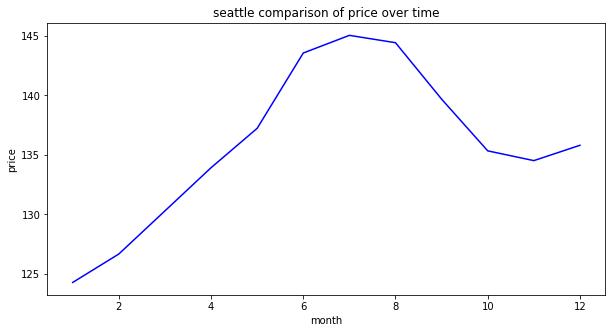

In [15]:
#Analyse data
# select one year 2016
seattle_calendar = seattle_calendar[seattle_calendar['year'] == 2016]
fig= plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.set_title('seattle comparison of price over time')
ax.set_xlabel('time')
ax.set_ylabel('price')
seattle_calendar.groupby('month')['cleaned_price'].mean().plot(kind='line',color='blue',ax=ax)

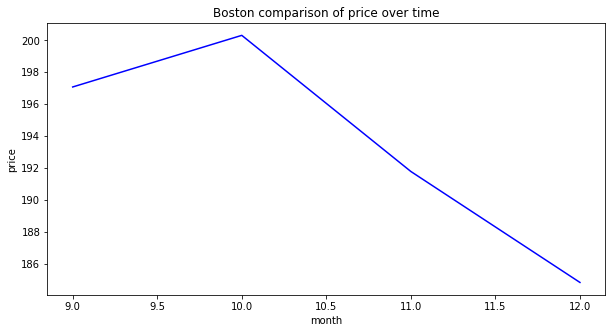

In [16]:
# select one year 2016
boston_calendar = boston_calendar[boston_calendar['year'] == 2016]
fig3= plt.figure(figsize=(10,5))
ax=fig3.add_subplot(111)
ax.set_title('Boston comparison of price over time')
ax.set_xlabel('time')
ax.set_ylabel('price')
boston_calendar.groupby('month')['cleaned_price'].mean().plot(kind='line',color='blue',ax=ax)

In [17]:
# Check non availability over time in seattle implying the bookings done
seattle_calendar_avail = seattle_calendar[seattle_calendar['available'] == 'f']
boston_calendar_avail = boston_calendar[boston_calendar['available']== 'f']


# merge listings with the booked dataframe
#print(seattle_calendar_avail.columns.values.tolist())
#print(seattle_listings.columns.values.tolist())
seattle_merged = pd.merge(seattle_calendar_avail, seattle_listings, on=['listing_id'])
boston_merged = pd.merge(boston_calendar_avail, boston_listings, on=['listing_id'])

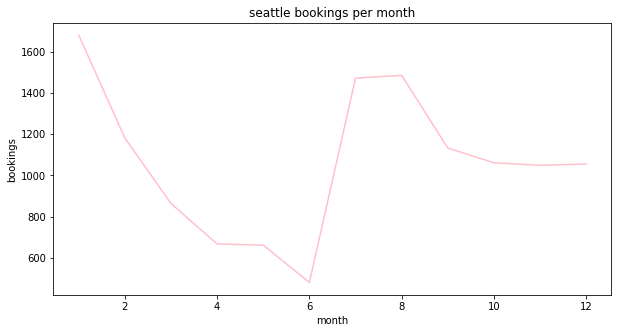

In [18]:
seattle_merged['accommodates']=pd.to_numeric(seattle_listings['accommodates'])
fig= plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.set_title('Seattle: bookings versus month')
ax.set_xlabel('month')
ax.set_ylabel('bookings')
seattle_merged.groupby('month')['accommodates'].sum().plot(kind='line',color='pink',ax=ax)

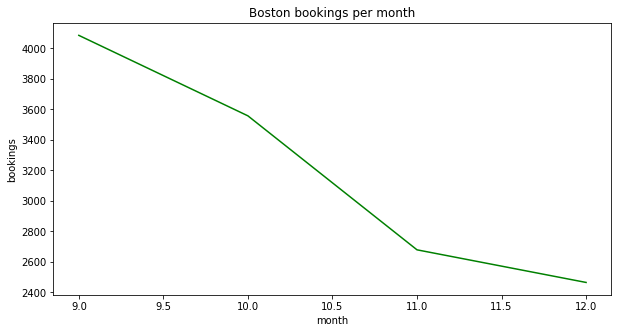

In [19]:
boston_merged['accommodates']=pd.to_numeric(seattle_listings['accommodates'])
fig= plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.set_title('Boston: Bookings versus Month')
ax.set_xlabel('month')
ax.set_ylabel('bookings')
boston_merged.groupby('month')['accommodates'].sum().plot(kind='line',color='green',ax=ax)

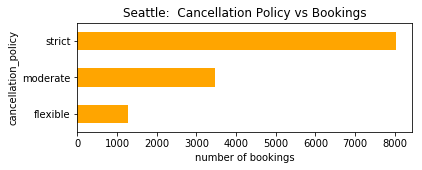

In [36]:
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(111)
ax.set_title('Seattle:  Cancellation Policy vs Bookings')
ax.set_xlabel('number of bookings')
ax.set_ylabel('neighbourhood')
seattle_merged.groupby('cancellation_policy')['accommodates'].sum().plot(kind='barh', color='orange', ax=ax)

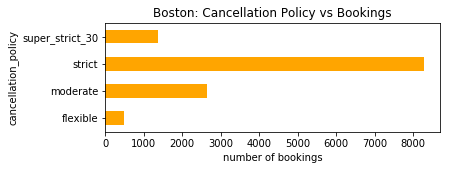

In [37]:
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(111)
ax.set_title('Boston: Cancellation Policy vs Bookings')
ax.set_xlabel('number of bookings')
ax.set_ylabel('neighbourhood')
boston_merged.groupby('cancellation_policy')['accommodates'].sum().plot(kind='barh', color='orange', ax=ax)

In [21]:
# Modelling
#print(seattle_merged.head())
seattle_listings_numeric = seattle_listings[['accommodates', 'bathrooms', 
                                                   'bedrooms','beds', 
                                                   'cleaning_fee', 'price']]
boston_listings_numeric = boston_listings[['accommodates', 'bathrooms', 
                                                   'bedrooms','beds', 
                                                   'cleaning_fee', 'price']]

boston_listings_category = boston_listings[['zipcode','property_type',
                                                     'room_type',
                                                     'cancellation_policy']]
seattle_listings_category = seattle_listings[['zipcode','property_type',
                                                     'room_type',
                                                     'cancellation_policy']]

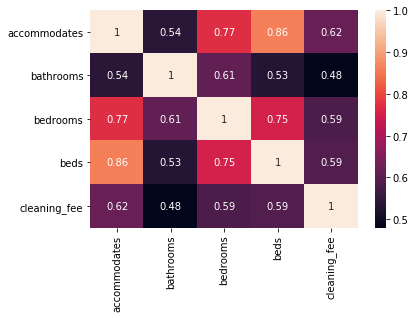

In [22]:

#Generate correlation matrix
corrMatrix_seattle =  seattle_listings_numeric.corr()
sns.heatmap(corrMatrix_seattle, annot=True)
plt.show()

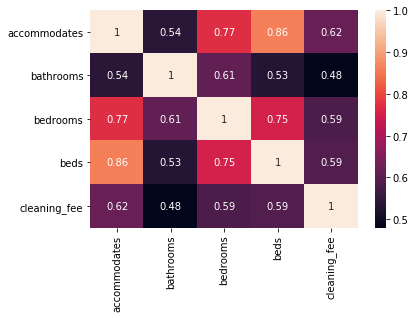

In [23]:
#Generate correlation matrix
corrMatrix_boston =  boston_listings_numeric.corr()
sns.heatmap(corrMatrix_seattle, annot=True)
plt.show()

In [24]:
def dummy_func(numeric, categ, dummyVar):
    for col in categ.columns:
        try:
            numeric = pd.concat([numeric, pd.getdummies(categ[col], prefix=col, prefix_sep='_', 
                                                        drop_first=True,dummyVar=dummyVar)], axis=1)
        except:
            continue
            
    return numeric        
            
            

In [25]:
seattle_listings_category.head()

concat_seattle = dummy_func(seattle_listings_numeric, seattle_listings_numeric, dummyVar=False)

concat_boston = dummy_func(boston_listings_numeric, boston_listings_numeric, dummyVar=False)

In [27]:
def fit_linear_mod(concat_df, test_size=.3, rand_state=42):
    '''
    INPUT:
    concat_df - a dataframe holding all the variables of interest
    test_size - a float between [0,1] about what proportion of data should
                be in the test dataset
    rand_state - an int that is provided as the random state for splitting 
                 the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    
    X = concat_df.drop('price', axis=1)
    y = concat_df['price']

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                        random_state=rand_state) 

    lm_model = LinearRegression(normalize=True)
    
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_train_preds = lm_model.predict(X_train) 
    y_test_preds = lm_model.predict(X_test) 

    train_score = r2_score(y_train, y_train_preds)
    test_score = r2_score(y_test, y_test_preds) 
    
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

#Testing function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(concat_seattle)
#Print training and testing score
print("The rsquared on the seattle training data was {}.  The rsquared on the test data was {}.".\
      format(train_score, test_score))
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(concat_boston)
#Print training and testing score
print("The rsquared on the boston training data was {}.  The rsquared on the test data was {}.".\
      format(train_score, test_score))

The rsquared on the seattle training data was 0.5169328379843321.  The rsquared on the test data was 0.5232032312315668.
The rsquared on the boston training data was 0.2683568457193819.  The rsquared on the test data was 0.19094627734595238.
